In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset 
import re  , string
from textacy.preprocessing.resources import (RE_EMAIL , RE_URL , RE_NUMBER ,
                                              RE_NUMBER , RE_EMOJI , RE_SHORT_URL , RE_PHONE_NUMBER
                                            )


In [3]:
dataset = load_dataset('csebuetnlp/xlsum',  'arabic') 

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 37519
    })
    test: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 4689
    })
    validation: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 4689
    })
})

In [5]:
dataset['train'][0]

{'id': '140323_russian_troops_crimea_naval_base',
 'url': 'https://www.bbc.com/arabic/worldnews/2014/03/140323_russian_troops_crimea_naval_base',
 'title': 'القوات الأوكرانية تبدأ الانسحاب من القرم',
 'summary': 'بدأت القوات الأوكرانية الانسحاب من شبه جزيرة القرم.',
 'text': 'وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينوف، قد أمر بسحب جميع القوات الأوكرانية من القرم. وسيطرت قوات روسية صباح الاثنين على قاعدة بحرية أوكرانية في فيودوسيا، في ثالث هجوم من نوعه خلال 48 ساعة، وذلك بحسب تصريحات مسؤولين أوكرانيين لبي بي سي . وقال المتحدث باسم وزارة الدفاع الأوكرانية فلاديسلاف سيليزنيوف إن القوات الروسية هاجمت القاعدة وألقت القبض على الجنود الأوكرانيين في قاعدة فيودوسيا وقيدت أيادي ضباطهم. ومن المتوقع أن تسيطر الأزمة الأوكرانية على قمة مجموعة الدول الصناعية السبع في لاهاي. مواضيع قد تهمك نهاية وأكد الرئيس الأمريكي باراك أوباما خلال لقاء مع نظيره الصيني شى جين بينغ على أن "واشنطن وبكين يمكنهما، بالعمل سويا، تعزيز القانون الدولي واحترام سيادة الدول". وتسيطر قوات روسية حاليا على معظم القواعد العسك

In [6]:
dataset = dataset.remove_columns(['id', 'url', 'title'])

In [7]:
dataset['train'][0]

{'summary': 'بدأت القوات الأوكرانية الانسحاب من شبه جزيرة القرم.',
 'text': 'وكان الرئيس الأوكراني المؤقت، الكسندر تورتشينوف، قد أمر بسحب جميع القوات الأوكرانية من القرم. وسيطرت قوات روسية صباح الاثنين على قاعدة بحرية أوكرانية في فيودوسيا، في ثالث هجوم من نوعه خلال 48 ساعة، وذلك بحسب تصريحات مسؤولين أوكرانيين لبي بي سي . وقال المتحدث باسم وزارة الدفاع الأوكرانية فلاديسلاف سيليزنيوف إن القوات الروسية هاجمت القاعدة وألقت القبض على الجنود الأوكرانيين في قاعدة فيودوسيا وقيدت أيادي ضباطهم. ومن المتوقع أن تسيطر الأزمة الأوكرانية على قمة مجموعة الدول الصناعية السبع في لاهاي. مواضيع قد تهمك نهاية وأكد الرئيس الأمريكي باراك أوباما خلال لقاء مع نظيره الصيني شى جين بينغ على أن "واشنطن وبكين يمكنهما، بالعمل سويا، تعزيز القانون الدولي واحترام سيادة الدول". وتسيطر قوات روسية حاليا على معظم القواعد العسكرية الأوكرانية في القرم التي أعلنت موسكو ضمها للاتحاد الروسي بعد استفتاء أجرته السلطات المحلية هناك. قلق بالغ وقال مارك لوين، مراسل بي بي سي في القرم، إن القوات الروسية تسيطر بشكل كامل على القاعدة، ون

In [8]:
dataset.items()

dict_items([('train', Dataset({
    features: ['summary', 'text'],
    num_rows: 37519
})), ('test', Dataset({
    features: ['summary', 'text'],
    num_rows: 4689
})), ('validation', Dataset({
    features: ['summary', 'text'],
    num_rows: 4689
}))])

In [9]:
def get_senetences_lenght(dataset , column_name , split):
   
    split = dataset[split][column_name]
    
    res = [len(x.split()) for x in split ]
    
    return res
    
        

In [10]:
splits = ['train', 'validation', 'test']

In [11]:
text_lengths = {}
for split in splits:
    text_lengths[split] = get_senetences_lenght(dataset , 'text' , split)

In [12]:
summary_lengths = {}
for split in splits:
    summary_lengths[split] = get_senetences_lenght(dataset , 'summary' , split)

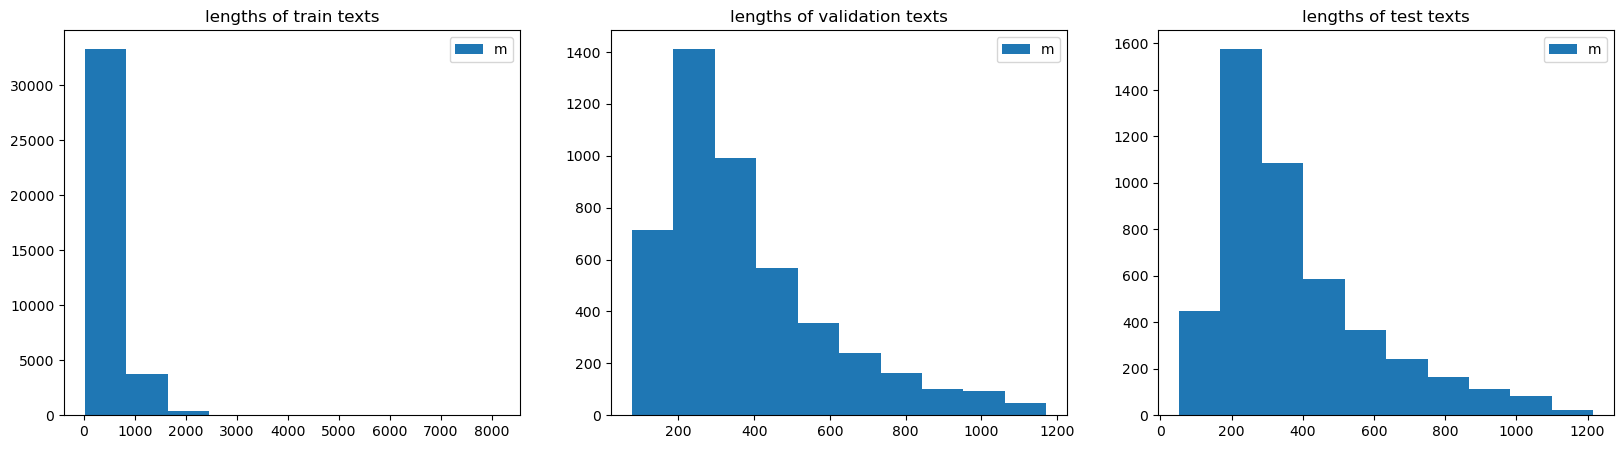

In [13]:
#visualize text lenghts 

fig , axes = plt.subplots(1 , 3 , figsize = (20 , 5))

for ax , split in zip(axes.flatten() ,splits) :
    ax.hist(np.array(text_lengths[split]))
    ax.set_title(f'lengths of {split} texts')
    ax.legend(f'min: {min(text_lengths[split])}, max:{max(text_lengths[split])} , avg: {sum(text_lengths[split])/len(text_lengths[split]):0.4f}')

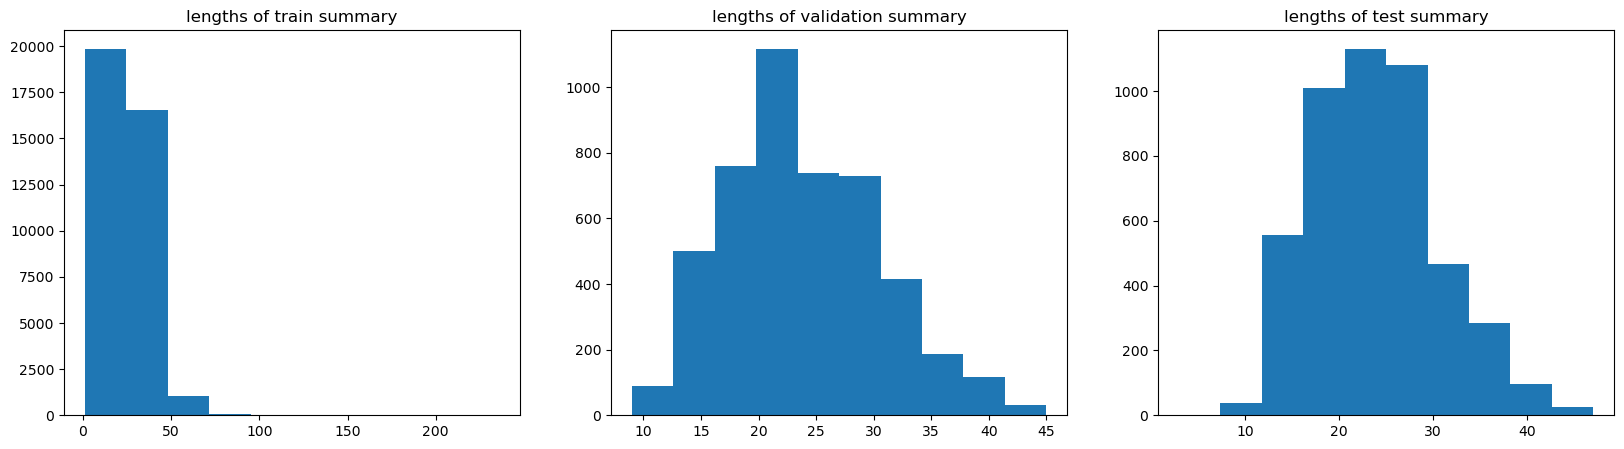

In [14]:
#visualize text lenghts 

fig , axes = plt.subplots(1 , 3 , figsize = (20 , 5))

for ax , split in zip(axes.flatten() ,splits) :
    ax.hist(np.array(summary_lengths[split]))
    ax.set_title(f'lengths of {split} summary')
    #ax.legend(f'min: {min(text_lengths[split])}, max:{max(text_lengths[split])} , avg: {sum(text_lengths[split])/len(text_lengths[split]):0.4f}')

In [15]:
#do some verification in our data 
from pprint import pprint
index = 120
sample = dataset['train'][index]
pprint(sample)

{'summary': 'ربما يبدو الاحتفال بشيء ما، هو آخر ما يمكن أن تريد فعله حينما تمر '
            'بأوقات عصيبة، لكن الدراسات تفيد بأن إقامتك حفلا، حتى ولو كان '
            'صغيرا للاحتفاء بلحظة عزيزة على قلبك مهما كانت بسيطة، كفيل ببعث '
            'السرور والبهجة في قلبك.',
 'text': 'على درب سار عليه الكثيرون خلال عام 2020، شرعت مقدمة البرامج '
         'التليفزيونية في الولايات المتحدة كاي لاني بالميسانو، في إعداد نوع من '
         'الخبز يحمل اسم "خبز العجين المخمر". وفي أواخر يناير/كانون الثاني '
         'الماضي، خبزت هذه السيدة البالغة من العمر 31 عاما، رغيفا مثاليا من '
         'هذا النوع، إلى حد وجدت أن ذلك يستحق احتفالا ما. وهكذا ارتدت لاني '
         'بالميسانو أفضل ما لديها من ملابس، والتقطت لنفسها صورة مع الرغيف ذي '
         'الشكل الكروي، قبل أن تُقطعَّه، وتعد مجموعة من شطائر الجبن المشوي '
         'الفاخر. وبعد ذلك صورت هذه الشطائر بدورها، ووضعت الصور جميعها على '
         'حسابها على موقع إنستغرام. في فترة ما قبل تفشي وباء كورونا، لم تكن '
         'بالميسانو - الحاصلة 

In [16]:
NON_ARABIC_RE = re.compile(r"[%s]"%string.ascii_letters)

In [18]:
def do_data_verification(dataset , split ):
    split = dataset[split]
    
    for column in ['text' , 'summary']:
        print(f'according to {column} ')
        is_there_email = any([bool(re.findall(RE_EMAIL , text)) for text in split[column]])
        is_there_url = any([bool(re.findall(RE_URL , text)) for text in split[column]])
        is_there_emoji = any([bool(re.findall(RE_EMOJI , text)) for text in split[column]])
        is_there_short_url = any([bool(re.findall(RE_SHORT_URL , text)) for text in split[column]])
        is_there_number = any([bool(re.findall(RE_NUMBER , text)) for text in split[column]])
        is_there_phone_number = any([bool(re.findall(RE_PHONE_NUMBER , text)) for text in split[column]])
        is_there_english_letters = any(bool(re.findall(NON_ARABIC_RE , text)) for text in split[column])
        print('is there email ? ' , is_there_email)
        print('is there url ? ' , is_there_url)
        print('is there emoji ? ' , is_there_emoji)
        print('is there short url ? ' , is_there_short_url)
        print('is there number  ? ' , is_there_number)
        print('is there phone number ? ' , is_there_phone_number)
        print("is there non arabic letters (especially english words) ? " , is_there_english_letters)
        print("======="*20)

In [19]:
do_data_verification(dataset , 'train')

according to text 
is there email ?  True
is there url ?  True
is there emoji ?  True
is there short url ?  True
is there number  ?  True
is there phone number ?  True
is there non arabic letters (especially english words) ?  True
according to summary 
is there email ?  False
is there url ?  False
is there emoji ?  False
is there short url ?  False
is there number  ?  True
is there phone number ?  True
is there non arabic letters (especially english words) ?  True


In [20]:
def remove_patterns(patterns , column):
    def clean(sample):
        text = sample[column]
        for pattern in patterns:
            text = re.sub(pattern ,"" , text)
        return {column : text}
            
    return clean

In [21]:
dataset['train'] = dataset['train'].map(remove_patterns(patterns=[RE_EMAIL , RE_EMOJI ,  RE_PHONE_NUMBER , RE_NUMBER, RE_SHORT_URL, NON_ARABIC_RE , RE_URL , r"\d+"] , 
                                                        column='text' ), batched=False)
dataset['train'] =  dataset['train'].map(remove_patterns(patterns=[ RE_PHONE_NUMBER , RE_NUMBER, NON_ARABIC_RE , r"\d+"] , 
                                                        column='summary' ), batched=False)

Map:   0%|          | 0/37519 [00:00<?, ? examples/s]

Map:   0%|          | 0/37519 [00:00<?, ? examples/s]

In [22]:
print("according validation")
do_data_verification(dataset , 'validation')

according validation
according to text 
is there email ?  True
is there url ?  True
is there emoji ?  True
is there short url ?  True
is there number  ?  True
is there phone number ?  True
is there non arabic letters (especially english words) ?  True
according to summary 
is there email ?  False
is there url ?  False
is there emoji ?  False
is there short url ?  False
is there number  ?  True
is there phone number ?  False
is there non arabic letters (especially english words) ?  True


In [23]:
dataset['validation'] = dataset['validation'].map(remove_patterns(patterns=[RE_EMAIL , RE_EMOJI , RE_NUMBER, RE_PHONE_NUMBER , RE_SHORT_URL, NON_ARABIC_RE, RE_URL, r"\d+"] , 
                                                        column='text' ), batched=False)
dataset['validation'] =  dataset['validation'].map(remove_patterns(patterns=[RE_NUMBER , NON_ARABIC_RE , r"\d+"] , 
                                                        column='summary' ), batched=False)

Map:   0%|          | 0/4689 [00:00<?, ? examples/s]

Map:   0%|          | 0/4689 [00:00<?, ? examples/s]

In [24]:
print("according test")
do_data_verification(dataset , 'test')

according test
according to text 
is there email ?  True
is there url ?  True
is there emoji ?  False
is there short url ?  True
is there number  ?  True
is there phone number ?  True
is there non arabic letters (especially english words) ?  True
according to summary 
is there email ?  False
is there url ?  False
is there emoji ?  False
is there short url ?  False
is there number  ?  True
is there phone number ?  True
is there non arabic letters (especially english words) ?  True


In [25]:
dataset['test'] = dataset['test'].map(remove_patterns(patterns=[RE_EMAIL  , RE_NUMBER, RE_PHONE_NUMBER , RE_SHORT_URL, NON_ARABIC_RE, r"\d+"] , 
                                                        column='text' ), batched=False)
dataset['test'] =  dataset['test'].map(remove_patterns(patterns=[RE_NUMBER, RE_PHONE_NUMBER , NON_ARABIC_RE, r"\d+"] , 
                                                        column='summary' ), batched=False)

Map:   0%|          | 0/4689 [00:00<?, ? examples/s]

Map:   0%|          | 0/4689 [00:00<?, ? examples/s]

In [26]:
#viusalize sentences length again 
text_lengths = {}
for split in splits:
    text_lengths[split] = get_senetences_lenght(dataset , 'text' , split)

In [27]:
summary_lengths = {}
for split in splits:
    summary_lengths[split] = get_senetences_lenght(dataset , 'summary' , split)

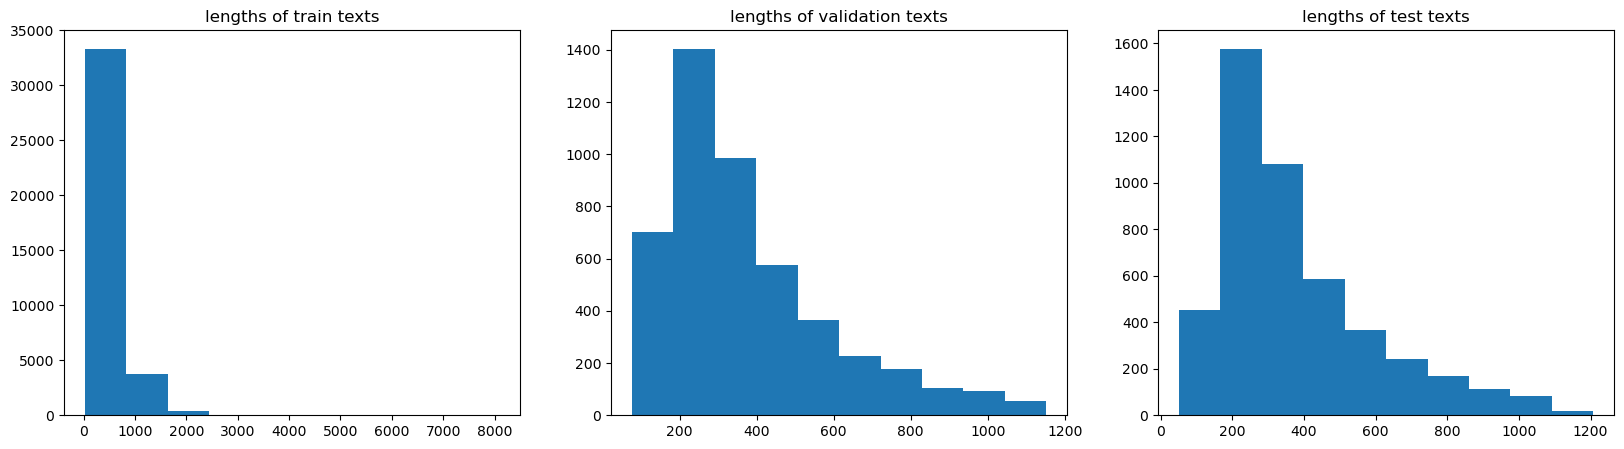

In [28]:
#visualize text lenghts 

fig , axes = plt.subplots(1 , 3 , figsize = (20 , 5))

for ax , split in zip(axes.flatten() ,splits) :
    ax.hist(np.array(text_lengths[split]))
    ax.set_title(f'lengths of {split} texts')
    #ax.legend(f'min: {min(text_lengths[split])}, max:{max(text_lengths[split])} , avg: {sum(text_lengths[split])/len(text_lengths[split]):0.4f}')

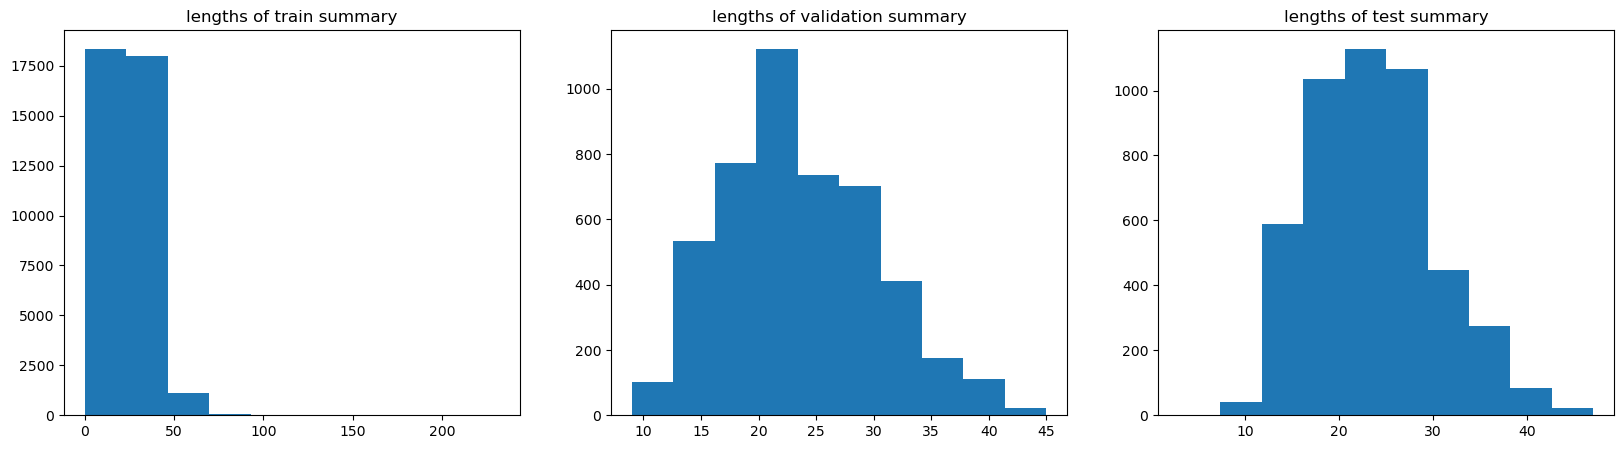

In [29]:
#visualize text lenghts 

fig , axes = plt.subplots(1 , 3 , figsize = (20 , 5))

for ax , split in zip(axes.flatten() ,splits) :
    ax.hist(np.array(summary_lengths[split]))
    ax.set_title(f'lengths of {split} summary')
    #ax.legend(f'min: {min(text_lengths[split])}, max:{max(text_lengths[split])} , avg: {sum(text_lengths[split])/len(text_lengths[split]):0.4f}')

In [33]:
#filter lengthes 
max_text_length = 1024
max_summary_length = 40
dataset = dataset.filter(lambda x : len(x['text'].split()) < max_text_length )
dataset = dataset.filter(lambda x : len(x['summary'].split()) < max_summary_length)

Filter:   0%|          | 0/34813 [00:00<?, ? examples/s]

Filter:   0%|          | 0/4617 [00:00<?, ? examples/s]

Filter:   0%|          | 0/4619 [00:00<?, ? examples/s]

In [34]:
dataset.save_to_disk("../datasets/cleaned_xlsum_arabic")

Saving the dataset (0/1 shards):   0%|          | 0/32877 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4547 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4559 [00:00<?, ? examples/s]

In [37]:
import os
os.chdir("..")
print(os.getcwd())

f:\Advanced-Text-Summarization-for-Arabic-A-Comparative-Study-of-Abstractive-and-Extractive-Techniques


In [38]:
#make data validation testing 
!pytest ./tests/data_validation_test.py

============================= test session starts =============================
platform win32 -- Python 3.10.13, pytest-7.1.2, pluggy-1.0.0
rootdir: f:\Advanced-Text-Summarization-for-Arabic-A-Comparative-Study-of-Abstractive-and-Extractive-Techniques
plugins: anyio-3.7.1
collected 7 items

tests\data_validation_test.py .......                                    [100%]

============================== warnings summary ===============================
C:\Users\oscar\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60
  C:\Users\oscar\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
    from pandas.core import (

C:\Users\oscar\anaconda3\lib\site-packages\torch\cuda\__init__.py:651
  C:\Users\oscar\anaconda3\lib\site-packages\torch\cuda\__init__.py:651: UserWarning: CUDA initialization: The NVIDIA driver on your system is to

In [39]:
#after that we can push it to hugging face 
from huggingface_hub import notebook_login

In [40]:
notebook_login()

In [41]:
dataset.push_to_hub("cleaned_xlsum_arabic")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/33 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Mohamed-Sami/cleaned_xlsum_arabic/commit/d6fd5c078ad1397debdcb51e60ad8134101f7121', commit_message='Upload dataset', commit_description='', oid='d6fd5c078ad1397debdcb51e60ad8134101f7121', pr_url=None, pr_revision=None, pr_num=None)